In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
f = pd.read_csv("./data/dirty_iris.csv")

In [8]:
f

Unnamed: 0  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width  \
0             1           5.1          3.5           1.4          0.2   
1             2           4.9          3.0           1.4          0.2   
2             3           4.7          3.2           1.3          0.2   
3             4           4.6          3.1           1.5          0.2   
4             5           NaN          3.6           1.4          0.2   
..          ...           ...          ...           ...          ...   
145         146           6.7          3.0           5.2          2.3   
146         147           6.3          2.5           5.0          1.9   
147         148           6.5          3.0           5.2          2.0   
148         149           6.2          3.4           5.4          2.3   
149         150           NaN          3.0           5.1          1.8   

       Species  
0       Setosa  
1       setosa  
2       setosa  
3       setosa  
4       setosa  
..         ...  
145  virginica  
146  virginica  
147  virginica  
148  virginica  
149  virginica  

[150 rows x 6 columns]

### Calculate the number and percentage of observations that are complete.

In [9]:
f.isnull()

Unnamed: 0  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width  Species
0         False         False        False         False        False    False
1         False         False        False         False        False    False
2         False         False        False         False        False    False
3         False         False        False         False        False    False
4         False          True        False         False        False    False
..          ...           ...          ...           ...          ...      ...
145       False         False        False         False        False    False
146       False         False        False         False        False    False
147       False         False        False         False        False    False
148       False         False        False         False        False    False
149       False          True        False         False        False    False

[150 rows x 6 columns]

In [10]:
f.dropna()

Unnamed: 0  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width  \
0             1           5.1          3.5           1.4          0.2   
1             2           4.9          3.0           1.4          0.2   
2             3           4.7          3.2           1.3          0.2   
3             4           4.6          3.1           1.5          0.2   
6             7           4.6          3.4           1.4          0.3   
..          ...           ...          ...           ...          ...   
141         142           6.9          3.1           5.1          2.3   
145         146           6.7          3.0           5.2          2.3   
146         147           6.3          2.5           5.0          1.9   
147         148           6.5          3.0           5.2          2.0   
148         149           6.2          3.4           5.4          2.3   

       Species  
0       Setosa  
1       setosa  
2       setosa  
3       setosa  
6       setosa  
..         ...  
141  virginica  
145  virginica  
146  virginica  
147  virginica  
148  virginica  

[131 rows x 6 columns]

In [11]:
number_complete = len(f.dropna())

In [12]:
number_complete

131

In [14]:
complete_percent = len(f.dropna())/len(f)*100
complete_percent

87.33333333333333

### Replace all the special values in data with NA.

In [15]:
f.fillna(value="NA",inplace=True)

### Define these rules in a separate text file and read them.
(Use editfile function in R (package editrules). Use similar function in Python).

Print the resulting constraint object.
- Species should be one of the following values: setosa, versicolor or virginica.
- All measured numerical properties of an iris should be positive.
- The petal length of an iris is at least 2 times its petal width.
- The sepal length of an iris cannot exceed 30 cm.
- The sepals of an iris are longer than its petals.

In [16]:
def species_check(f) :
    species = set(["setosa","versicolor","virginica"])
    func = lambda r : r in species
    x = np.array([func(xi) for xi in f["Species"]])
    if (False in x) :
        print("Violation : Invalid species name")
        print(str(len(x) - np.sum(x)) + " violations")
    else :
        print("No Violation")
    return (len(x) - np.sum(x))

In [17]:
species_check(f)

Violation : Invalid species name
5 violations


5

In [20]:
temp = pd.read_csv("./data/dirty_iris.csv")

In [21]:
temp.dropna(inplace = True)

In [22]:
temp

Unnamed: 0  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width  \
0             1           5.1          3.5           1.4          0.2   
1             2           4.9          3.0           1.4          0.2   
2             3           4.7          3.2           1.3          0.2   
3             4           4.6          3.1           1.5          0.2   
6             7           4.6          3.4           1.4          0.3   
..          ...           ...          ...           ...          ...   
141         142           6.9          3.1           5.1          2.3   
145         146           6.7          3.0           5.2          2.3   
146         147           6.3          2.5           5.0          1.9   
147         148           6.5          3.0           5.2          2.0   
148         149           6.2          3.4           5.4          2.3   

       Species  
0       Setosa  
1       setosa  
2       setosa  
3       setosa  
6       setosa  
..         ...  
141  virginica  
145  virginica  
146  virginica  
147  virginica  
148  virginica  

[131 rows x 6 columns]

In [23]:
def all_positive(f) :
    func = lambda r : r>0
    a = np.array([func(f[xi]) for xi in f.columns[:-1]])
    a = a.reshape(a.shape[0]*a.shape[1])
    if (False in a) :
        print("Violation : Non-positive values present")
        print(str(len(a) - np.sum(a)) + " violations")
    else :
        print("No Violation")
    return (len(a) - np.sum(a))

In [24]:
all_positive(temp)

No Violation


0

In [25]:
temp["Petal.Length"]>(2*temp["Petal.Width"])

0      True
1      True
2      True
3      True
6      True
       ... 
141    True
145    True
146    True
147    True
148    True
Length: 131, dtype: bool

In [28]:
def check_petal(f) :
    a = np.array(f["Petal.Length"]>(2*f["Petal.Width"]))
    if (False in a) :
        print("Violation : Petal Length is less than twice of Petal Width in some places")
        print(str(len(a) - np.sum(a)) + " violations")
    else :
        print("No Violation")
    return (len(a) - np.sum(a))

check_petal(temp)

No Violation


0

In [29]:
def sepal_check(f) :
    a = np.array(f["Sepal.Length"]<=30)
    if (False in a) :
        print("Violation : Sepal Length is greater than 30 cm in some places")
        print(str(len(a) - np.sum(a)) + " violations")
    else :
        print("No Violation")
    return (len(a) - np.sum(a))
    
sepal_check(temp)

No Violation


0

In [30]:
def sepal_petal_check(f) :
    a = np.array(f["Sepal.Length"]>f["Petal.Length"])
    if (False in a) :
        print("Violation : Sepal length is greater than petal length in some places")
        print(str(len(a) - np.sum(a)) + " violations")
    else :
        print("No Violation")
    return (len(a) - np.sum(a))
    
sepal_petal_check(temp)

No Violation


0

### Determine how often each rule is broken (violatedEdits). Also summarize and plot the result. Find outliers in sepal length using boxplot and boxplot.stats

In [32]:
rules = {"species_check" : species_check, "all_positive" : all_positive, "check_petal" : check_petal, "sepal_check" : sepal_check, "sepal_petal_check" : sepal_petal_check}

In [33]:
x = []
for i in rules.keys() :
    x.append(rules[i](temp))
    
f.loc[0,:]

Violation : Invalid species name
5 violations
No Violation
No Violation
No Violation
No Violation


Unnamed: 0           1
Sepal.Length       5.1
Sepal.Width        3.5
Petal.Length       1.4
Petal.Width        0.2
Species         Setosa
Name: 0, dtype: object

In [34]:
plt.bar(rules.keys(),x)
plt.show()

In [35]:
f.describe()

Unnamed: 0  Petal.Length  Petal.Width
count  150.000000    150.000000   150.000000
mean    75.500000      3.758000     1.199333
std     43.445368      1.765298     0.762238
min      1.000000      1.000000     0.100000
25%     38.250000      1.600000     0.300000
50%     75.500000      4.350000     1.300000
75%    112.750000      5.100000     1.800000
max    150.000000      6.900000     2.500000

In [36]:
temp.describe()

Unnamed: 0  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
count  131.000000    131.000000   131.000000    131.000000   131.000000
mean    75.297710      5.848092     3.036641      3.787786     1.203053
std     41.959632      0.844926     0.446388      1.761556     0.748839
min      1.000000      4.300000     2.000000      1.000000     0.100000
25%     39.500000      5.100000     2.800000      1.550000     0.300000
50%     76.000000      5.800000     3.000000      4.400000     1.300000
75%    110.500000      6.400000     3.300000      5.100000     1.800000
max    149.000000      7.900000     4.400000      6.900000     2.500000

In [37]:
z = []
for i in range(len(temp.columns)-1) :
    z.append(temp[temp.columns[i]])

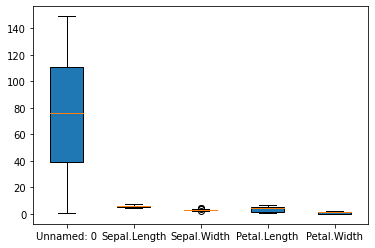

In [38]:
plt.boxplot(z,labels=temp.columns[:-1],patch_artist=True)
plt.show()